## Prerequisites 

### Create a virtual environment with required packages

You can follow the instructions in the README on how to create a conda environment that can run thsi notebook. You can then choose the kernel you created to run this notebook.

### Get the credentials to access polytope. 

You need to have an account on the [Destination Earth Platform](https://auth.destine.eu/realms/desp/account).

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

The generated access tokens will be written to `~/.polytopeapirc`.

In [8]:
import xarray as xr
import numpy as np
import eccodes
import healpy as hp
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs

In [9]:
import earthkit.data

request = {
        "class": "d1",
        "dataset": "climate-dt",
        "activity": "scenariomip",
        "experiment": "ssp3-7.0",
        "realization": "1",
        "generation" : "1",
        "model": "icon",
        "resolution": "high",
        "expver": "0001",
        "stream": "clte",
        "date": "20251129",
        "time": "0000",
        "type": "fc",
        "levelist" : "2",
        "levtype": "o3d",
        "param": "263501"
}

data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)


2024-04-24 09:50:53 - INFO - Key read from /home/jovyan/.polytopeapirc
2024-04-24 09:50:53 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20251129'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            "levelist: '2'\n"
            'levtype: o3d\n'
            'model: icon\n'
            "param: '263501'\n"
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-04-24 09:50:53 - INFO - Polytope user key found in session cache for user jovyan
2024-04-24 09:50:55 - INFO - Request accepted. Please poll http://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/1df373b4-c2d1-4777-97f7-556d510fb01d for status
2024-04-24 09:50:55 - INFO - Polytope user key found in session cache for user jovyan
2024-04-24 0

In [12]:
dnp=data[0].values-273

hp.pixelfunc.get_map_size(dnp)

12582912

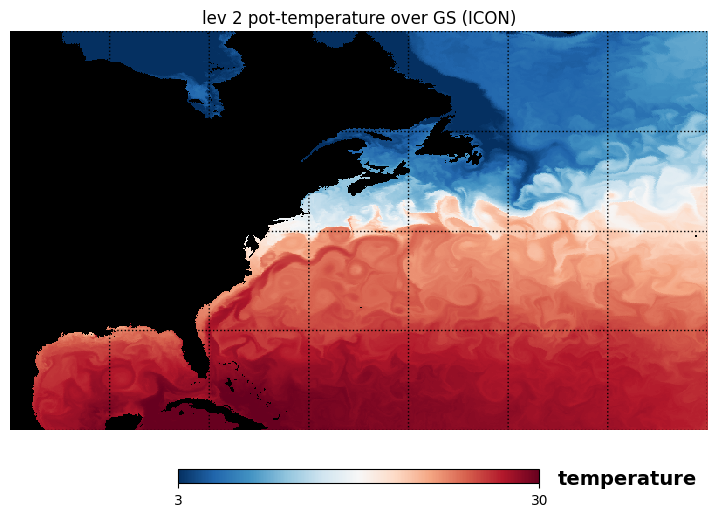

In [13]:

interpolated_data = hp.cartview(dnp,
            flip="geo", 
            nest=True, 
            rot=[0,0,],
            unit='temperature',
            lonra=[-100,-30],
            latra=[20, 60],
            title='lev 2 pot-temperature over GS (ICON)',
            min=3,
            max=30,
            # notext=True
            cmap =cm.RdBu_r,
            badcolor='black',
            return_projected_map=True
           )
hp.graticule(dpar=10, dmer=10)

In [14]:
request = {
        "class": "d1",
        "dataset": "climate-dt",
        "activity": "scenariomip",
        "experiment": "ssp3-7.0",
        "realization": "1",
        "generation" : "1",
        "model": "ifs-nemo",
        "resolution": "high",
        "expver": "0001",
        "stream": "clte",
        "date": "20251129",
        "time": "0000",
        "type": "fc",
        "levelist" : "2",
        "levtype": "o3d",
        "param": "263501"
    }

data2 = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)

2024-04-24 09:54:20 - INFO - Key read from /home/jovyan/.polytopeapirc
2024-04-24 09:54:20 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20251129'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            "levelist: '2'\n"
            'levtype: o3d\n'
            'model: ifs-nemo\n'
            "param: '263501'\n"
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-04-24 09:54:20 - INFO - Polytope user key found in session cache for user jovyan
2024-04-24 09:54:23 - INFO - Request accepted. Please poll http://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/e9818fa0-8cae-4071-a383-49ac2f2f3e6b for status
2024-04-24 09:54:23 - INFO - Polytope user key found in session cache for user jovyan
2024-04-

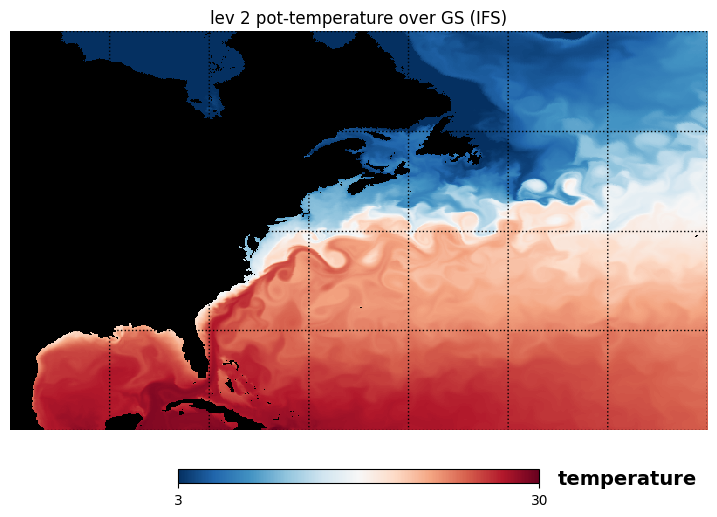

In [15]:
dnp2=data2[0].values-273

interpolated_data = hp.cartview(dnp2,
            flip="geo", 
            nest=True, 
            rot=[0,0,],
            unit='temperature',
            lonra=[-100,-30],
            latra=[20, 60],
            title='lev 2 pot-temperature over GS (IFS)',
            min=3,
            max=30,
            # notext=True
            cmap =cm.RdBu_r,
            badcolor='black',
            return_projected_map=True
           )
hp.graticule(dpar=10, dmer=10)